In [1]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
url = 'https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory'
data = pandas.read_html(url)
data = data[12]
data.head()

,Unnamed: 0,Country,Deaths / million,Deaths,Cases
0,NaN,World[a],887,7086620,777348321
1,NaN,Peru,6601,220994,4528708
2,NaN,Bulgaria,5679,38765,1338316
3,NaN,North Macedonia,5428,9990,352060
4,NaN,Bosnia and Herzegovina,5118,16404,404142


In [33]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [37]:
data = data.replace(to_replace = 'World[a]', value = 'World')

In [41]:
data.dtypes

Country             object
Deaths / million    object
Deaths              object
Cases               object
dtype: object

In [59]:
data = data[~data['Deaths'].str.contains('member')]

In [61]:
data = data[~data['Deaths / million'].str.contains('member')]

In [63]:
data = data[~data['Cases'].str.contains('member')]

In [65]:
data['Deaths / million'] = data['Deaths / million'].astype('int')
data['Deaths'] = data['Deaths'].astype('int')
data['Cases'] = data['Cases'].astype('int')

In [69]:
data.dtypes

Country             object
Deaths / million     int32
Deaths               int32
Cases                int32
dtype: object

In [71]:
data.isnull().sum()

Country             0
Deaths / million    0
Deaths              0
Cases               0
dtype: int64

In [73]:
data.head()

,Country,Deaths / million,Deaths,Cases
0,World,887,7086620,777348321
1,Peru,6601,220994,4528708
2,Bulgaria,5679,38765,1338316
3,North Macedonia,5428,9990,352060
4,Bosnia and Herzegovina,5118,16404,404142


In [75]:
data.drop(0, axis = 0, inplace = True)

In [77]:
data.head()

,Country,Deaths / million,Deaths,Cases
1,Peru,6601,220994,4528708
2,Bulgaria,5679,38765,1338316
3,North Macedonia,5428,9990,352060
4,Bosnia and Herzegovina,5118,16404,404142
5,Hungary,5072,49124,2237650


In [79]:
df = data.head()

Text(0.5, 1.0, 'Top 5 Covid-19 cases per population')

<Figure size 2000x1000 with 0 Axes>

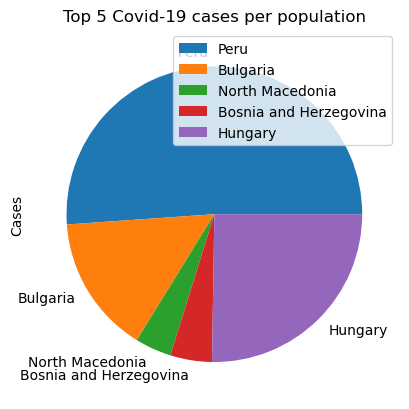

In [85]:
plt.figure(figsize = (20, 10))
df.plot(kind = 'pie', y = 'Cases', labels = df['Country'])
plt.title('Top 5 Covid-19 cases per population')

In [87]:
data = data.sort_values(by = 'Cases', ascending  = False)

In [105]:
data = data.replace(to_replace = 'China[c]', value = 'China')

In [107]:
data = data[data['Country'] != 'European Union[b]']

In [109]:
df = data.head()

Text(0.5, 1.0, 'Top 5 Covid-19 cases')

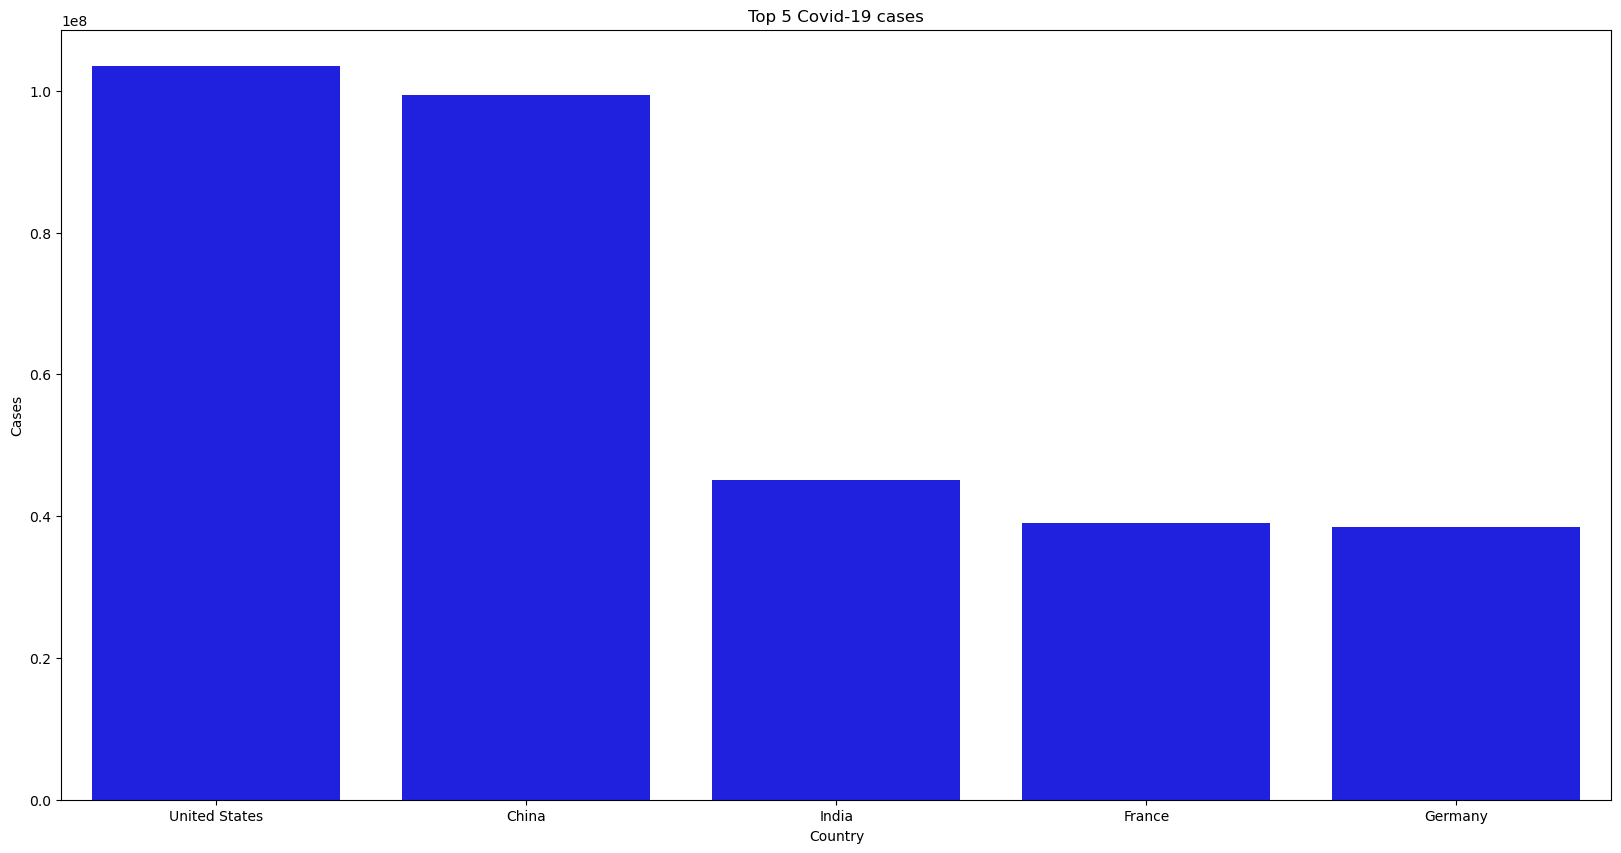

In [113]:
plt.figure(figsize = (20, 10))
sns.barplot(data = df, x = 'Country', y = 'Cases', color = 'b')
plt.title('Top 5 Covid-19 cases')

In [115]:
df = data.tail()

Text(0.5, 1.0, 'Least Covid-10 cases')

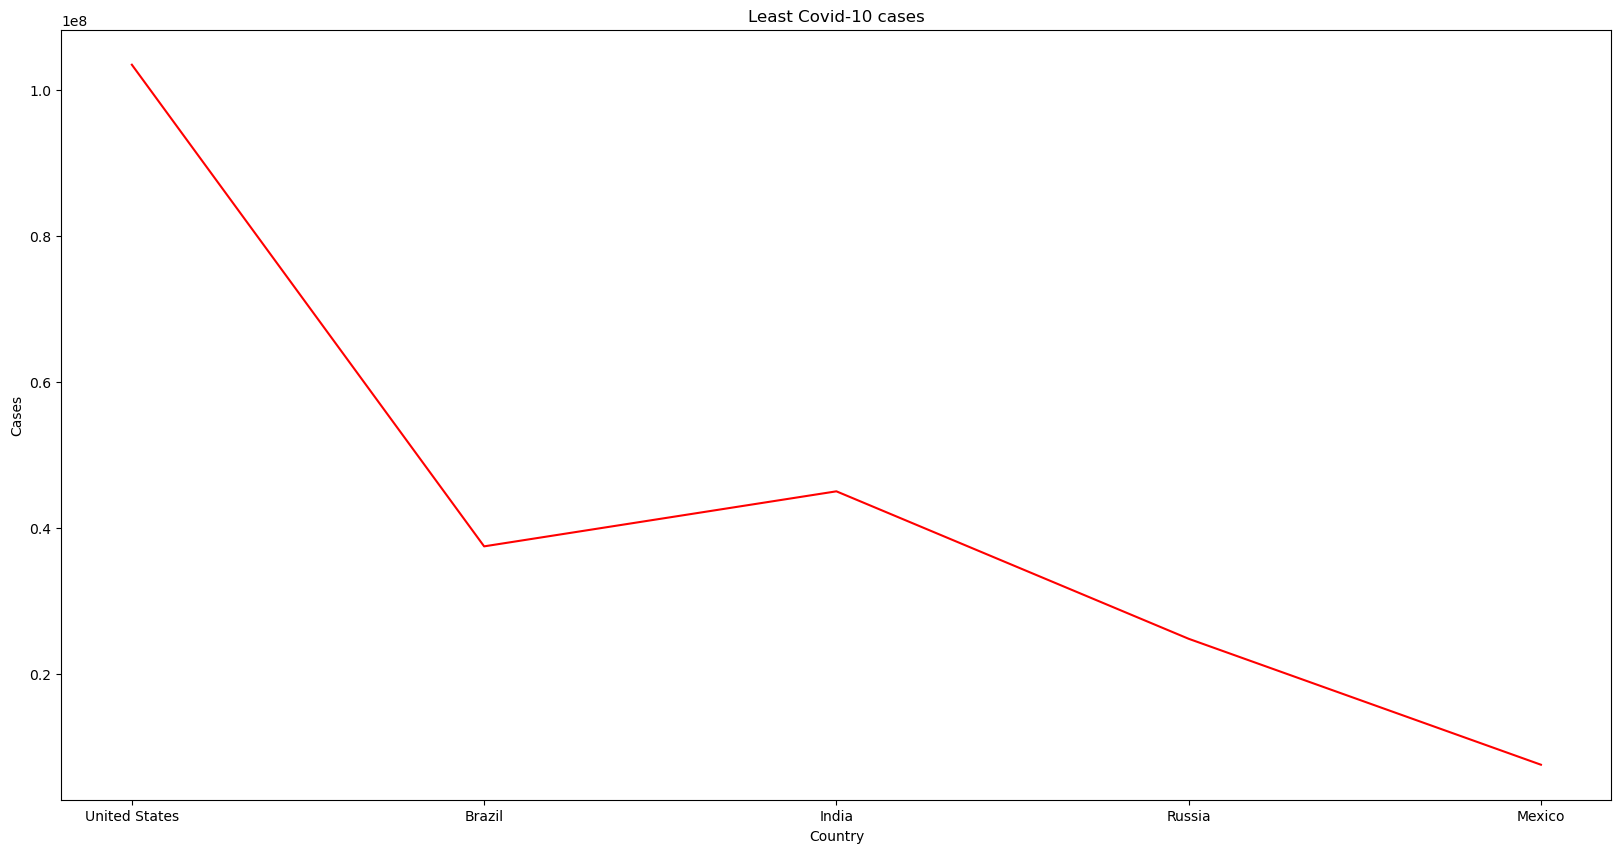

In [131]:
plt.figure(figsize = (20, 10))
sns.lineplot(data = df, x = 'Country', y = 'Cases', color = 'r')
plt.title('Least Covid-10 cases')

In [121]:
data = data.sort_values(by = 'Deaths', ascending = False)

In [123]:
df = data.head()

Text(0.5, 1.0, 'Top Covid-19 deaths')

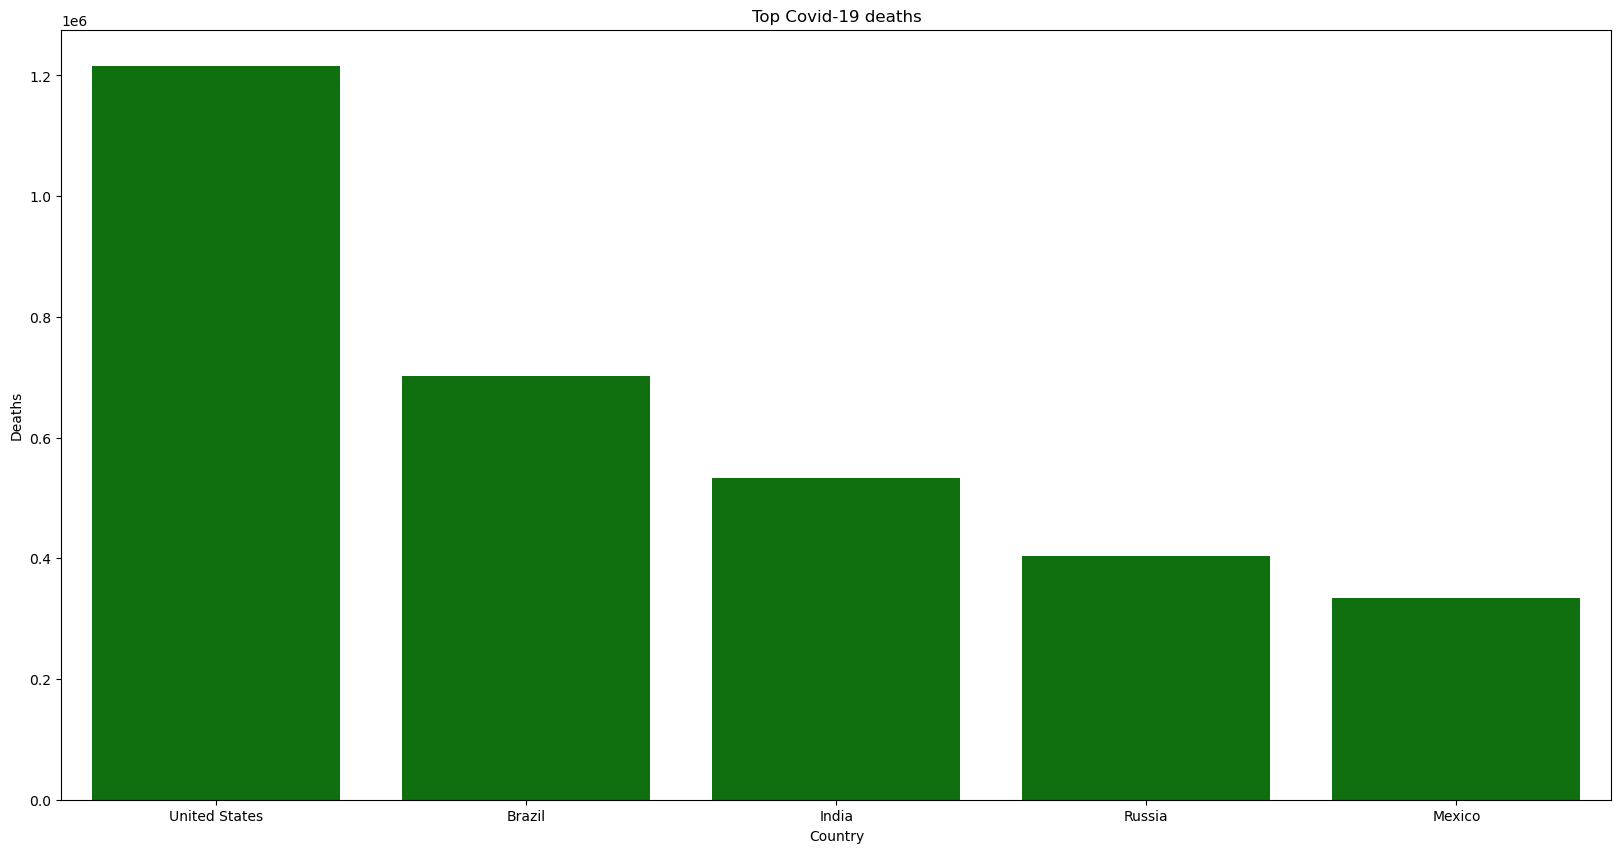

In [125]:
plt.figure(figsize = (20, 10))
sns.barplot(data = df, x = 'Country', y = 'Deaths', color = 'g')
plt.title('Top Covid-19 deaths')